## Today we will learn

-> How to initilized the quantum state <br>
-> Mariginal counts <br>
-> Teleportation in great detail <br>

Disclaimer : Once again, we are unable to proceed with implementing the circuit in Quantum Computing at this stage,<br>
as we believe it is important to first gain a clearer understanding of some foundational concepts. <br>
Other aspects are not a priority at the moment. <br>
<br>

##### ---> Homework

## Lets start with importing the required packages

In [17]:
%pip install qiskit[visualization]
%pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.1 MB/s eta 0:00:00


In [1]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit.result import *

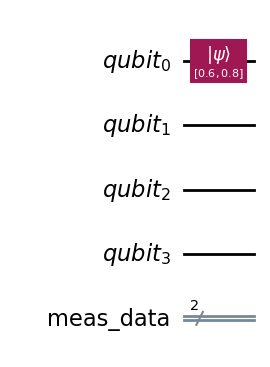

In [5]:
n =4
k =2
qubit  = QuantumRegister(n, 'qubit')

meas_data = ClassicalRegister(k, 'meas_data')

qc = QuantumCircuit(qubit, meas_data)
random_state = [0.6,0.8]


qc.initialize(random_state, qubit[0])

qc.draw("mpl")

In [3]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

In [6]:
probs = sv.probabilities()
print(probs)

[0.36 0.64 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [11]:
counts = sv.sample_counts(shots= 1024)
print(counts)

{np.str_('0000'): np.int64(366), np.str_('0001'): np.int64(658)}


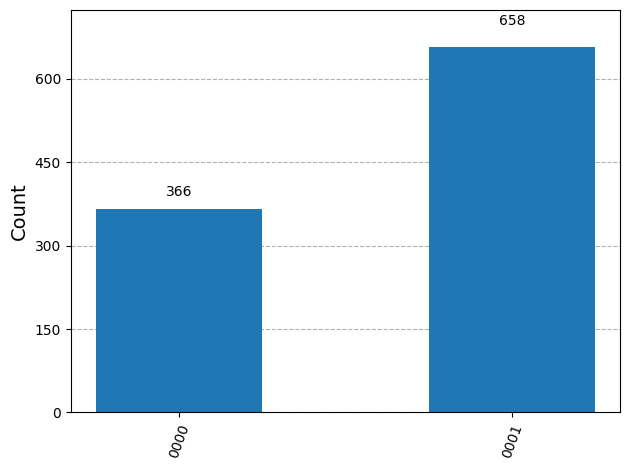

In [12]:
plot_histogram(counts)

In [13]:
samples = sv.sample_memory(shots = 100)
print(samples)

['0001' '0001' '0000' '0001' '0001' '0000' '0001' '0001' '0001' '0001'
 '0000' '0000' '0001' '0000' '0001' '0001' '0001' '0001' '0001' '0001'
 '0001' '0000' '0001' '0001' '0001' '0001' '0001' '0000' '0000' '0000'
 '0001' '0000' '0000' '0000' '0000' '0001' '0001' '0000' '0000' '0001'
 '0001' '0001' '0000' '0000' '0000' '0001' '0001' '0000' '0000' '0000'
 '0001' '0000' '0001' '0001' '0001' '0001' '0001' '0001' '0001' '0001'
 '0000' '0000' '0001' '0001' '0001' '0001' '0000' '0001' '0001' '0000'
 '0000' '0000' '0001' '0000' '0000' '0001' '0001' '0001' '0001' '0001'
 '0000' '0001' '0001' '0001' '0001' '0001' '0001' '0001' '0001' '0001'
 '0001' '0001' '0001' '0001' '0001' '0000' '0000' '0000' '0001' '0001']


In [14]:
density_mat = DensityMatrix(qc)
density_mat.draw('latex')

<IPython.core.display.Latex object>

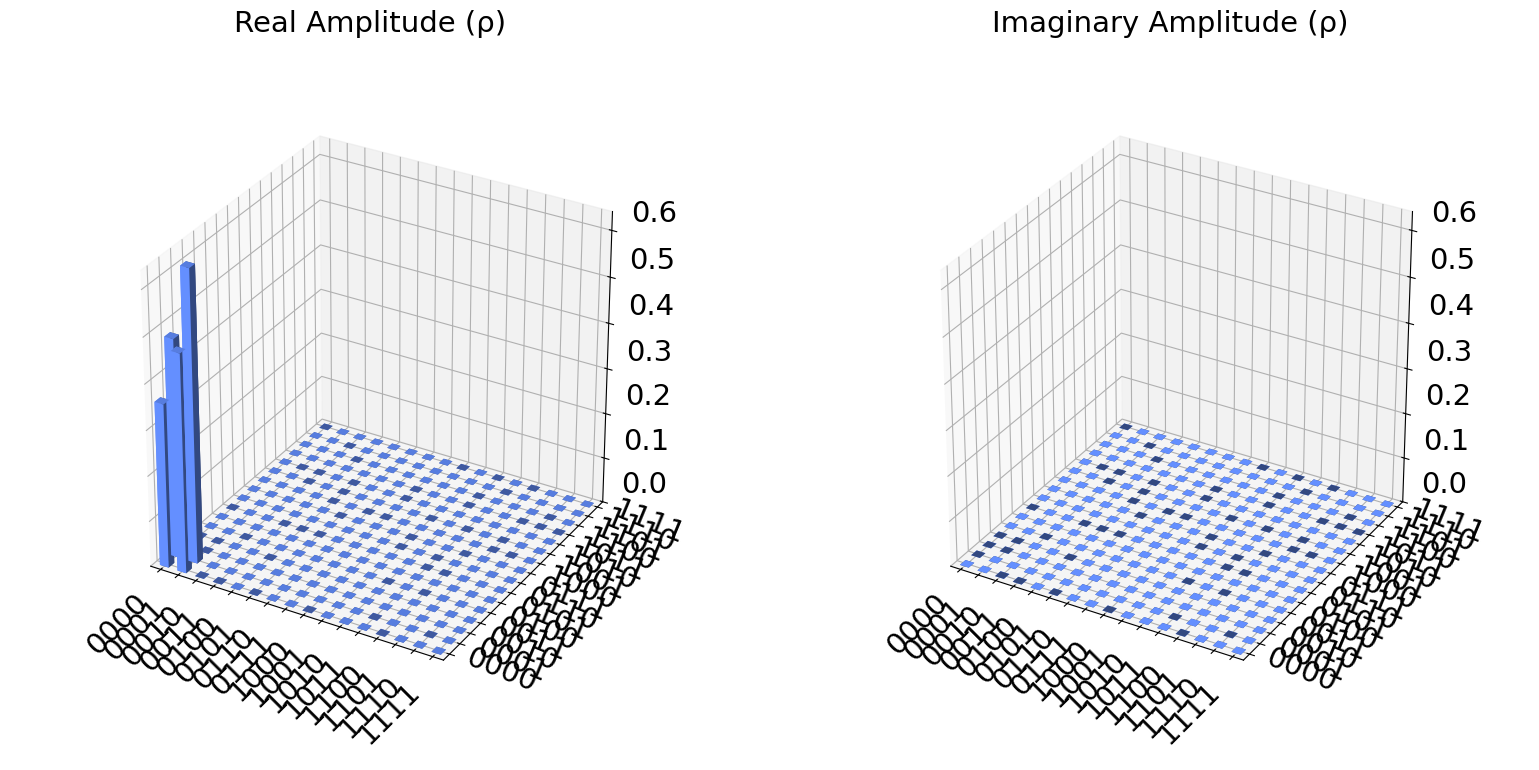

In [15]:
density_mat.draw('city')

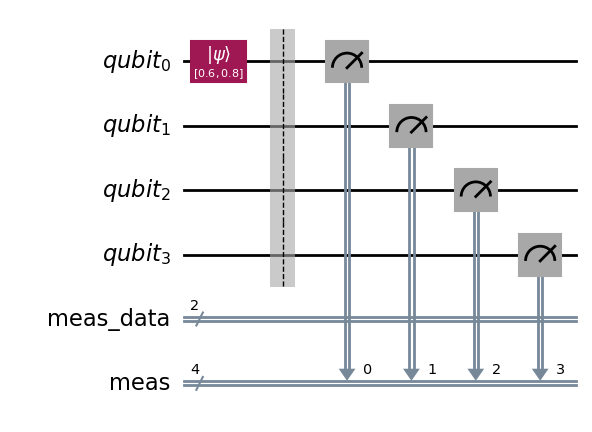

In [16]:
qc.measure_all()
# qc.measure(3,meas_data[0])
qc.draw('mpl')

## How measurement works and things we need to take care
### Homework to check about the rewrite value

In [17]:
qc.measure([0,1],[meas_data[0],meas_data[1]])
#qc.measure([2],meas_data[1]])

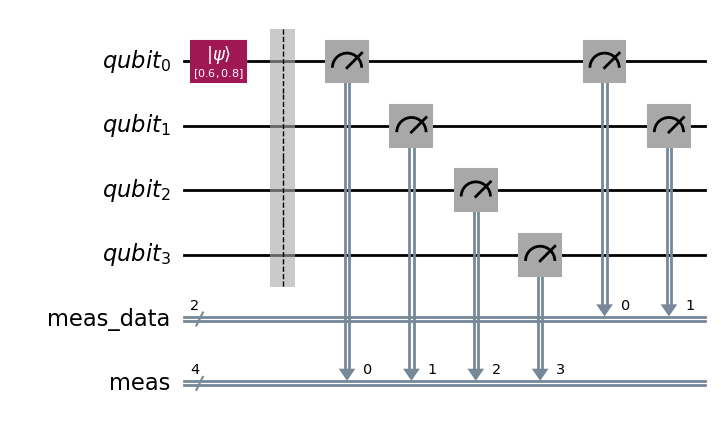

In [18]:
qc.draw('mpl')

### We need the simulator

In [14]:
from qiskit.providers.basic_provider import BasicSimulator

In [18]:
# first we need the simulator
simulator_basic = BasicSimulator()

# now run the cirucit using that simulator
# shots is the number of times we want to run the circuit

job = simulator_basic.run(qc,shots = 1024)

#Once we have the job , we can get the result
result = job.result()
print(result)

BasicProviderError: 'basic_simulator encountered unrecognized operation "initialize"'

## Get the correct simulation

In [19]:
from qiskit_aer import Aer

In [20]:
simulator = Aer.get_backend('aer_simulator')

In [21]:
# circuit = transpile(qc, simulator, optimization_level=3)
job = simulator.run(qc, shots=256)
result = job.result()
result

Result(backend_name='aer_simulator', backend_version='0.17.0', job_id='ea8d3560-39b5-48c1-915a-7f28ef49a003', success=True, results=[ExperimentResult(shots=256, success=True, meas_level=2, data=ExperimentResultData(counts={'0x5': 157, '0x0': 99}), header={'creg_sizes': [['meas_data', 2], ['meas', 4]], 'global_phase': 0.0, 'memory_slots': 6, 'n_qubits': 4, 'name': 'circuit-161', 'qreg_sizes': [['qubit', 4]], 'metadata': {}}, status=DONE, seed_simulator=2677244455, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 12, 'parallel_shots': 1, 'sample_measure_time': 0.001604625, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3], 'device': 'CPU', 'time_taken': 0.003216368, 'measure_sampling': True, 'num_clbits': 6, 'max_memory_mb': 16384, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'num_qubits': 4, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled': True, 'thr

In [22]:
counts = result.get_counts()
counts
# plot_histogram(counts)

{'0001 01': 157, '0000 00': 99}

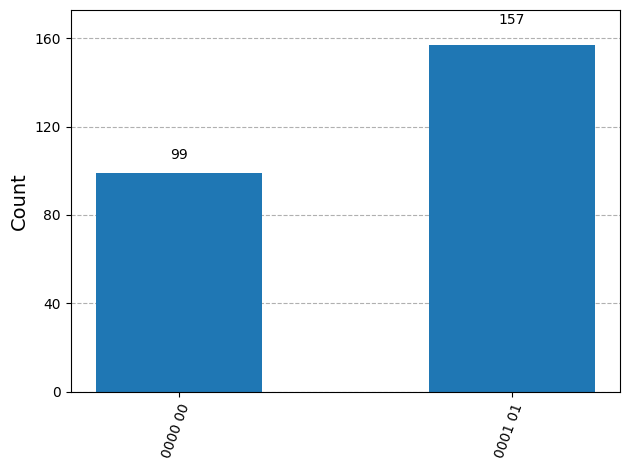

In [23]:
plot_histogram(counts)

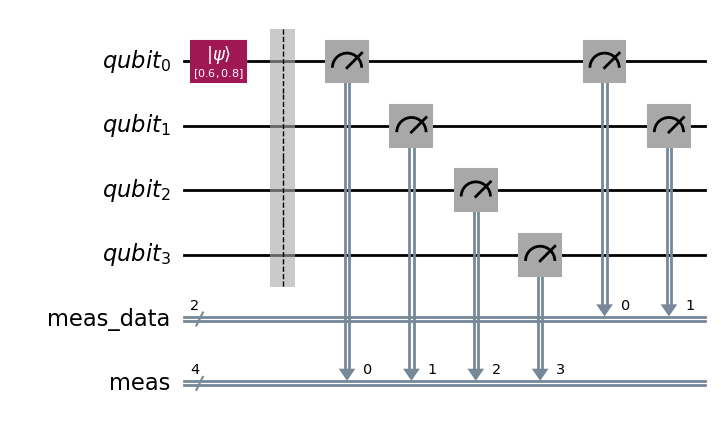

In [24]:
qc.draw('mpl')

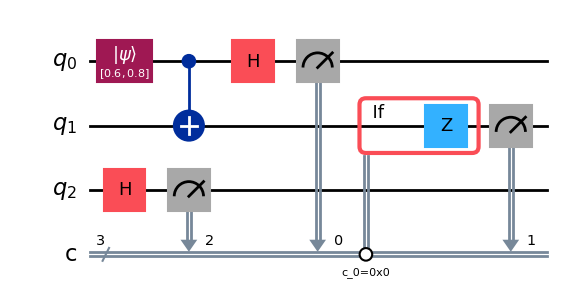

In [25]:
qc1 = QuantumCircuit(3, 3)
random_state = [0.6,0.8]
qc1.initialize(random_state, 0)
qc1.cx(0, 1)
qc1.h(0)
qc1.h(2)
qc1.measure(0, 0)
with qc1.if_test((qc1.clbits[0], 0)):
    qc1.z(1)
# qc1.x(1)
qc1.measure([1,2], [1,2])
qc1.draw('mpl')

In [26]:
# circuit = transpile(qc, simulator, optimization_level=3)
job = simulator.run(qc1, shots=100000)
result = job.result()
counts = result.get_counts()
counts

{'101': 8846,
 '011': 15923,
 '111': 15875,
 '110': 16170,
 '100': 8942,
 '001': 9295,
 '000': 9004,
 '010': 15945}

In [27]:
mcounts = marginal_counts(counts, [i for i in range(2)])
mcounts

{'01': 18141, '11': 31798, '10': 32115, '00': 17946}

In [28]:
marginal_distribution(counts, indices=[1,0])

{'01': 32115, '11': 31798, '10': 18141, '00': 17946}

In [29]:
mcounts = marginal_counts(counts, indices=[2,0])
mcounts

{'01': 25006, '00': 25048, '11': 25031, '10': 24915}

In [30]:
ProbDistribution(mcounts)

{1: 25006, 0: 25048, 3: 25031, 2: 24915}

In [31]:
result.to_dict()

{'backend_name': 'aer_simulator',
 'backend_version': '0.17.0',
 'date': '2025-04-12T10:16:11.890262',
 'header': None,
 'job_id': '7dae8538-1c45-4b32-b582-8e65f1ee4315',
 'status': 'COMPLETED',
 'success': True,
 'results': [{'shots': 100000,
   'success': True,
   'data': {'counts': {'0x1': 9094,
     '0x0': 9046,
     '0x2': 16002,
     '0x5': 8941,
     '0x6': 15954,
     '0x4': 8961,
     '0x7': 16090,
     '0x3': 15912}},
   'meas_level': <MeasLevel.CLASSIFIED: 2>,
   'header': {'creg_sizes': [['c', 3]],
    'global_phase': 0.0,
    'memory_slots': 3,
    'n_qubits': 3,
    'name': 'circuit-176',
    'qreg_sizes': [['q', 3]],
    'metadata': {}},
   'status': 'DONE',
   'seed_simulator': 234769938,
   'metadata': {'time_taken': 1.791535827,
    'num_bind_params': 1,
    'parallel_state_update': 1,
    'required_memory_mb': 1,
    'input_qubit_map': [[2, 2], [1, 1], [0, 0]],
    'method': 'statevector',
    'device': 'CPU',
    'num_qubits': 3,
    'active_input_qubits': [0, 1, 2]

## Teleportation Circuit

 <img src="figs/teleportation.png" alt="harsh"/>

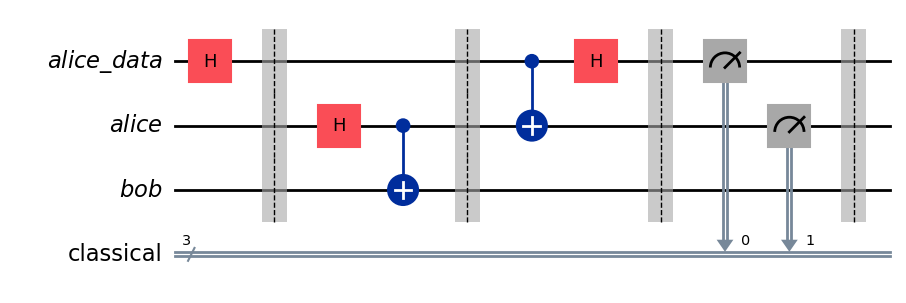

In [32]:
alice_data = QuantumRegister(1, 'alice_data')
bob = QuantumRegister(1, 'bob')
alice = QuantumRegister(1, 'alice')
classical = ClassicalRegister(3, 'classical')

teleport = QuantumCircuit(alice_data,alice,bob, classical)

teleport.h(alice_data)

teleport.barrier()
teleport.h(alice)
teleport.cx(alice, bob)
teleport.barrier()

teleport.cx(alice_data, alice)
teleport.h(alice_data)
teleport.barrier()
teleport.measure(alice_data,classical[0])
teleport.measure(alice,classical[1])
teleport.barrier()

teleport.draw('mpl')

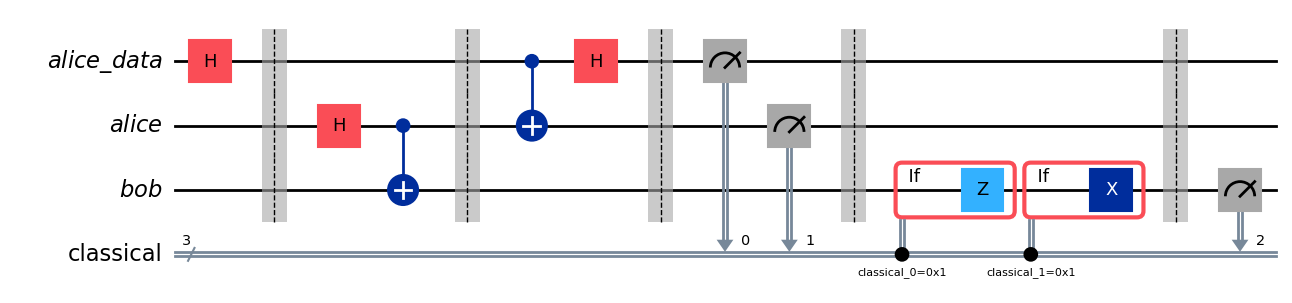

In [33]:
with teleport.if_test((classical[0], 1)):
    teleport.z(bob)
with teleport.if_test((classical[1], 1)):
    teleport.x(bob)
teleport.barrier()
teleport.measure(bob, classical[2])
teleport.draw('mpl')

In [34]:
backed = Aer.get_backend('aer_simulator')
job = backed.run(teleport, shots=100000)
result = job.result()
counts = result.get_counts()
counts


{'001': 12536,
 '011': 12543,
 '111': 12416,
 '000': 12550,
 '010': 12461,
 '101': 12438,
 '100': 12434,
 '110': 12622}

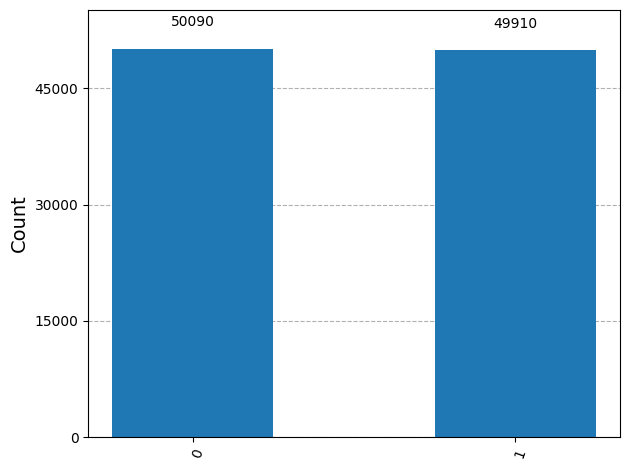

In [35]:
marginal_counts(counts, indices=[2])
plot_histogram(marginal_counts(counts, indices=[2]))

### Using functions

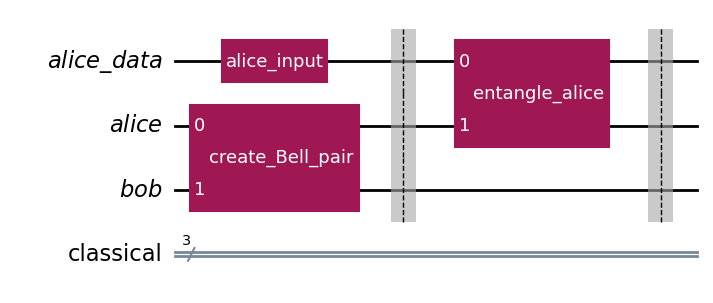

In [36]:
def bell_state():
    qc = QuantumCircuit(2,name='create_Bell_pair')
    qc.h(0)
    qc.cx(0, 1)
    return qc

def alice_input(state):
    qc = QuantumCircuit(1,name='alice_input')
    qc.initialize(state, 0)
    return qc

def entangle_alice():
    qc = QuantumCircuit(2, name='entangle_alice')
    qc.cx(0,1)
    qc.h(0)
    return qc


alice_data = QuantumRegister(1, 'alice_data')
bob = QuantumRegister(1, 'bob')
alice = QuantumRegister(1, 'alice')
classical = ClassicalRegister(3, 'classical')

tel = QuantumCircuit(alice_data,alice,bob, classical)

tel.append(bell_state().to_instruction(), [alice, bob])
tel.append(alice_input([0.6, 0.8]), [alice_data])
tel.barrier()
tel.append(entangle_alice(), [alice_data, alice])
tel.barrier()
tel.draw('mpl')

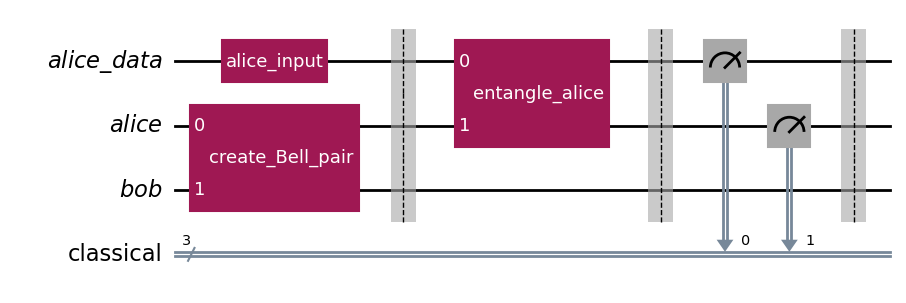

In [37]:
tel.measure(alice_data, classical[0])
tel.measure(alice, classical[1])
tel.barrier()
tel.draw('mpl')

## How to use the qiskit for simulation

#### try to see what will happend if we will take different bell states.

#### can we apply quantum gates instead of those classical condition based quantum gates (hint: control not).

#### can we generalized the result with general bell states (hint: use mathematics).


#### can we append quantum circuit to another quantum circuit(vertically).

#### make an account on IBM by login into https://quantum.ibm.com/


                                                           THANKYOU                                                                                           